In [28]:
import os
import shutil
import random
import cv2

%matplotlib inline

In [29]:
dataset= os.path.expanduser("~/notebooks/UCF11_updated_mpg")

In [30]:
categories=os.listdir(dataset)
print("Categories:",categories)

Categories: ['golf_swing', 'biking', 'diving', 'swing', 'tennis_swing', 'basketball', 'trampoline_jumping', 'volleyball_spiking', 'walking', 'soccer_juggling', 'horse_riding']


In [31]:
import os
import shutil
import random
import re

original_dataset = os.path.expanduser("~/notebooks/UCF11_updated_mpg")
output_base = os.path.expanduser("~/notebooks/split_ucf11")

for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(output_base, split), exist_ok=True)

# Helper function to extract group number from folder name
def extract_group_number(name):
    match = re.search(r'(\d+)', name)
    return int(match.group(1)) if match else -1

classes = [cls for cls in os.listdir(original_dataset)
           if os.path.isdir(os.path.join(original_dataset, cls)) and cls != "annotations"]

for cls in classes:
    class_path = os.path.join(original_dataset, cls)

    group_folders = [f for f in os.listdir(class_path)
                     if os.path.isdir(os.path.join(class_path, f)) and f.startswith("v_")]
    
    group_folders.sort(key=extract_group_number)

    # Split into test (groups 20-25), rest for train/val
    test_groups = [g for g in group_folders if 20 <= extract_group_number(g) <= 25]
    remaining_groups = [g for g in group_folders if extract_group_number(g) < 20]

    # Randomly pick 20% of remaining for validation
    val_count = int(len(remaining_groups) * 0.2)
    val_groups = random.sample(remaining_groups, val_count)
    train_groups = [g for g in remaining_groups if g not in val_groups]

    split_map = {
        'train': train_groups,
        'val': val_groups,
        'test': test_groups
    }

    for split_name, groups in split_map.items():
        for group in groups:
            group_path = os.path.join(class_path, group)
            for file in os.listdir(group_path):
                if file.endswith(".mpg"):
                    src = os.path.join(group_path, file)
                    dst_dir = os.path.join(output_base, split_name, cls)
                    os.makedirs(dst_dir, exist_ok=True)
                    shutil.copy2(src, os.path.join(dst_dir, file))

    print(f"Finished processing class: {cls}")


Finished processing class: golf_swing
Finished processing class: biking
Finished processing class: diving
Finished processing class: swing
Finished processing class: tennis_swing
Finished processing class: basketball
Finished processing class: trampoline_jumping
Finished processing class: volleyball_spiking
Finished processing class: walking
Finished processing class: soccer_juggling
Finished processing class: horse_riding


In [32]:
video_root = os.path.expanduser("~/notebooks/split_ucf11")  
output_root = os.path.expanduser("~/notebooks/frame_dataset")
splits = ['train', 'val', 'test']
frames_per_video = 5
resize_dim = (112, 112)  

for split in splits:
    for cls in os.listdir(os.path.join(video_root, split)):
        out_dir = os.path.join(output_root, split, cls)
        os.makedirs(out_dir, exist_ok=True)

for split in splits:
    split_path = os.path.join(video_root, split)
    for cls in os.listdir(split_path):
        class_path = os.path.join(split_path, cls)
        videos = [f for f in os.listdir(class_path) if f.endswith(".mpg")]
        
        for video in videos:
            video_path = os.path.join(class_path, video)
            cap = cv2.VideoCapture(video_path)
            frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            
            if frame_count < frames_per_video:
                frame_idxs = list(range(frame_count))
            else:
                frame_idxs = sorted(random.sample(range(frame_count), frames_per_video))
            
            saved = 0
            current_frame = 0
            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break

                if current_frame in frame_idxs:
                    resized = cv2.resize(frame, resize_dim, interpolation= cv2.INTER_AREA)
                    frame_filename = f"{video[:-4]}_f{current_frame:03d}.jpg"
                    out_path = os.path.join(output_root, split, cls, frame_filename)
                    cv2.imwrite(out_path, resized)
                    saved += 1
                    if saved == len(frame_idxs):
                        break

                current_frame += 1

            cap.release()

        print(f"Finished {split}/{cls}")


Finished train/golf_swing
Finished train/biking
Finished train/diving
Finished train/swing
Finished train/tennis_swing
Finished train/basketball
Finished train/trampoline_jumping
Finished train/volleyball_spiking
Finished train/walking
Finished train/soccer_juggling
Finished train/horse_riding
Finished val/golf_swing
Finished val/biking
Finished val/diving
Finished val/swing
Finished val/tennis_swing
Finished val/basketball
Finished val/trampoline_jumping
Finished val/volleyball_spiking
Finished val/walking
Finished val/soccer_juggling
Finished val/horse_riding
Finished test/golf_swing
Finished test/biking
Finished test/diving
Finished test/swing
Finished test/tennis_swing
Finished test/basketball
Finished test/trampoline_jumping
Finished test/volleyball_spiking
Finished test/walking
Finished test/soccer_juggling
Finished test/horse_riding


In [33]:
import os

frame_root = os.path.expanduser("~/notebooks/frame_dataset")

for split in ["train", "val", "test"]:
    print(f"\n {split.upper()} SET")
    split_path = os.path.join(frame_root, split)
    
    for cls in os.listdir(split_path):
        cls_path = os.path.join(split_path, cls)
        count = len([f for f in os.listdir(cls_path) if f.endswith(".jpg")])
        print(f"  {cls:20}: {count} frames")



 TRAIN SET
  golf_swing          : 868 frames
  biking              : 916 frames
  diving              : 1078 frames
  swing               : 976 frames
  tennis_swing        : 1181 frames
  basketball          : 877 frames
  trampoline_jumping  : 797 frames
  volleyball_spiking  : 808 frames
  walking             : 846 frames
  soccer_juggling     : 1071 frames
  horse_riding        : 1281 frames

 VAL SET
  golf_swing          : 167 frames
  biking              : 177 frames
  diving              : 299 frames
  swing               : 202 frames
  tennis_swing        : 318 frames
  basketball          : 280 frames
  trampoline_jumping  : 188 frames
  volleyball_spiking  : 202 frames
  walking             : 232 frames
  soccer_juggling     : 248 frames
  horse_riding        : 315 frames

 TEST SET
  golf_swing          : 400 frames
  biking              : 427 frames
  diving              : 362 frames
  swing               : 308 frames
  tennis_swing        : 356 frames
  basketball      

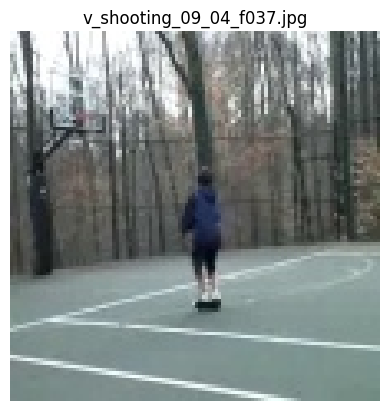

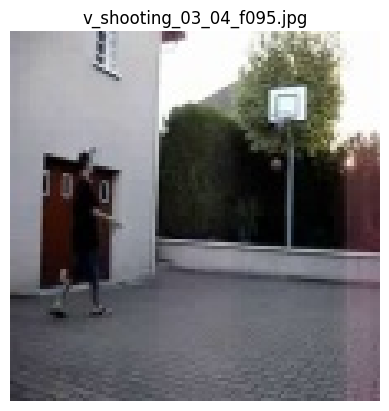

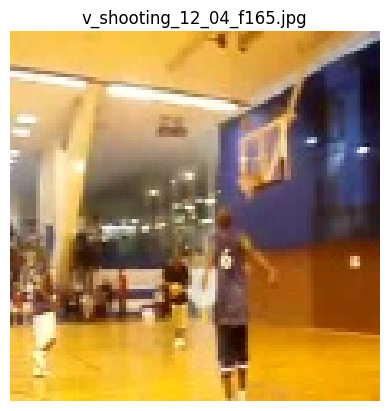

In [34]:
#just checking

import matplotlib.pyplot as plt
import cv2
import random

sample_class = "basketball"  # pick any class
split = "train"
sample_path = os.path.expanduser(f"~/notebooks/frame_dataset/{split}/{sample_class}")
sample_imgs = random.sample(os.listdir(sample_path), 3)

for img in sample_imgs:
    frame = cv2.imread(os.path.join(sample_path, img))
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame)
    plt.title(img)
    plt.axis('off')
    plt.show()


In [35]:
import torch
import torchvision
print(torch.__version__)
print(torchvision.__version__)


2.6.0+cu124
0.21.0+cu124


In [36]:
#just checking 

import os

base_path = os.path.expanduser("~/notebooks/frame_dataset")

for split in ["train", "val", "test"]:
    path = os.path.join(base_path, split)
    if os.path.exists(path):
        print(f"{split.upper()} folder found ?")
        classes = os.listdir(path)
        print(f"  Classes in {split}: {classes[:3]}{' ...' if len(classes) > 3 else ''}")
    else:
        print(f"{split.upper()} folder NOT found")


TRAIN folder found ?
  Classes in train: ['golf_swing', 'biking', 'diving'] ...
VAL folder found ?
  Classes in val: ['golf_swing', 'biking', 'diving'] ...
TEST folder found ?
  Classes in test: ['golf_swing', 'biking', 'diving'] ...


In [37]:
import os
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torch import nn, optim
from tqdm import tqdm

In [38]:
data_root = os.path.expanduser("~/notebooks/frame_dataset")
train_dir = os.path.join(data_root, "train")
val_dir = os.path.join(data_root, "val")
num_classes = 11
batch_size = 32
num_epochs = 10
learning_rate = 0.001

transform = transforms.Compose([
    transforms.Resize((112, 112)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

train_dataset = ImageFolder(train_dir, transform=transform)
val_dataset = ImageFolder(val_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

device = torch.device("cpu")

# Load pretrained ResNet18 and modify the final layer
model = torchvision.models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_acc = correct / total * 100
    print(f" Epoch {epoch+1} | Train Loss: {total_loss:.4f} | Train Acc: {train_acc:.2f}%")

    # Validation
    model.eval()
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_acc = val_correct / val_total * 100
    print(f" Validation Accuracy: {val_acc:.2f}%\n")

# Save the trained model
torch.save(model.state_dict(), "resnet18_ucf11_frame_classifier.pth")
print(" Model saved as resnet18_ucf11_frame_classifier.pth")

/home/exouser/.conda/envs/my5920_env/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/exouser/.conda/envs/my5920_env/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epoch 1/10: 100%|██████████| 335/335 [03:08<00:00,  1.78it/s]


 Epoch 1 | Train Loss: 123.7710 | Train Acc: 88.68%
 Validation Accuracy: 93.76%



Epoch 2/10: 100%|██████████| 335/335 [02:44<00:00,  2.04it/s]


 Epoch 2 | Train Loss: 43.5340 | Train Acc: 95.82%
 Validation Accuracy: 93.15%



Epoch 3/10: 100%|██████████| 335/335 [02:47<00:00,  2.00it/s]


 Epoch 3 | Train Loss: 23.8113 | Train Acc: 97.79%
 Validation Accuracy: 97.11%



Epoch 4/10: 100%|██████████| 335/335 [02:44<00:00,  2.03it/s]


 Epoch 4 | Train Loss: 17.2419 | Train Acc: 98.41%
 Validation Accuracy: 97.11%



Epoch 5/10: 100%|██████████| 335/335 [02:44<00:00,  2.03it/s]


 Epoch 5 | Train Loss: 23.1124 | Train Acc: 97.80%
 Validation Accuracy: 93.95%



Epoch 6/10: 100%|██████████| 335/335 [02:45<00:00,  2.02it/s]


 Epoch 6 | Train Loss: 19.8344 | Train Acc: 98.14%
 Validation Accuracy: 96.96%



Epoch 7/10: 100%|██████████| 335/335 [02:45<00:00,  2.03it/s]


 Epoch 7 | Train Loss: 10.6001 | Train Acc: 99.10%
 Validation Accuracy: 95.40%



Epoch 8/10: 100%|██████████| 335/335 [02:44<00:00,  2.04it/s]


 Epoch 8 | Train Loss: 16.9313 | Train Acc: 98.52%
 Validation Accuracy: 96.08%



Epoch 9/10: 100%|██████████| 335/335 [02:43<00:00,  2.05it/s]


 Epoch 9 | Train Loss: 6.5791 | Train Acc: 99.38%
 Validation Accuracy: 97.83%



Epoch 10/10: 100%|██████████| 335/335 [02:47<00:00,  2.00it/s]


 Epoch 10 | Train Loss: 9.1318 | Train Acc: 99.14%
 Validation Accuracy: 94.44%

 Model saved as resnet18_ucf11_frame_classifier.pth


In [39]:
import os
import cv2
import torch
import torchvision
import torch.nn.functional as F
from torchvision import transforms
from torchvision.datasets import ImageFolder
from tqdm import tqdm
import numpy as np

In [41]:
video_root = os.path.expanduser("~/notebooks/split_ucf11/test")
model_path = "resnet18_ucf11_frame_classifier.pth"
frame_sample_counts = [1, 3, 5, 10]  
resize_dim = (112, 112)
device = torch.device("cpu") 

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(resize_dim),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

#loading model
model = torchvision.models.resnet18(pretrained=False)
model.fc = torch.nn.Linear(model.fc.in_features, 11)
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()

train_data = ImageFolder(os.path.expanduser("~/notebooks/frame_dataset/train"))
idx_to_class = {v: k for k, v in train_data.class_to_idx.items()}

# folder name : class name mapping
folder_to_class = {
    "golf": "golf_swing",
    "tennis": "tennis_swing",
    "shooting": "basketball",
    "jumping": "trampoline_jumping",
    "horse": "horse_riding",
    "swing": "swing",
    "walking": "walking",
    "soccer": "soccer_juggling",
    "diving": "diving",
    "biking": "biking",
    "volleyball": "volleyball_spiking"
}

# === EVALUATE WITH DIFFERENT FRAME COUNTS ===
for N in frame_sample_counts:
    print(f"\n Evaluating with {N} frame(s) per video...")
    total = 0
    correct = 0

    for class_folder in sorted(os.listdir(video_root)):
        actual_class = folder_to_class.get(class_folder, None)
        if actual_class is None:
            continue 

        class_path = os.path.join(video_root, class_folder)

        for video_file in os.listdir(class_path):
            if not video_file.endswith(".mpg"):
                continue

            video_path = os.path.join(class_path, video_file)
            cap = cv2.VideoCapture(video_path)
            frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

            if frame_count < N:
                frame_idxs = list(range(frame_count))
            else:
                frame_idxs = sorted(np.random.choice(frame_count, N, replace=False))

            preds = []
            current_frame = 0
            idx_ptr = 0

            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break

                if current_frame == frame_idxs[idx_ptr]:
                    frame_tensor = transform(frame).unsqueeze(0).to(device)
                    with torch.no_grad():
                        out = model(frame_tensor)
                        prob = F.softmax(out, dim=1)
                        preds.append(prob.cpu().numpy()[0])
                    idx_ptr += 1
                    if idx_ptr == len(frame_idxs):
                        break

                current_frame += 1

            cap.release()

            if preds:
                avg_pred = np.mean(preds, axis=0)
                pred_class_idx = int(np.argmax(avg_pred))
                pred_class = idx_to_class[pred_class_idx]

                # Print per-video prediction (optional)
                # print(f"Video: {video_file} | Predicted: {pred_class} | Actual: {actual_class}")

                if pred_class == actual_class:
                    correct += 1
                total += 1

    accuracy = correct / total * 100
    print(f" Accuracy with {N} frames: {accuracy:.2f}% ({correct}/{total})")


 Evaluating with 1 frame(s) per video...
 Accuracy with 1 frames: 46.43% (65/140)

 Evaluating with 3 frame(s) per video...
 Accuracy with 3 frames: 50.71% (71/140)

 Evaluating with 5 frame(s) per video...
 Accuracy with 5 frames: 49.29% (69/140)

 Evaluating with 10 frame(s) per video...
 Accuracy with 10 frames: 51.43% (72/140)


#### Evaluating again with only the middle frames:

In [42]:

video_root = os.path.expanduser("~/notebooks/split_ucf11/test")
model_path = "resnet18_ucf11_frame_classifier.pth"
frame_sample_counts = [1, 3, 5, 10]
resize_dim = (112, 112)  
device = torch.device("cpu")

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(resize_dim),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

model = torchvision.models.resnet18(pretrained=False)
model.fc = torch.nn.Linear(model.fc.in_features, 11)
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()


train_data = ImageFolder(os.path.expanduser("~/notebooks/frame_dataset/train"))
idx_to_class = {v: k for k, v in train_data.class_to_idx.items()}

folder_to_class = {
    "golf": "golf_swing",
    "tennis": "tennis_swing",
    "shooting": "basketball",
    "jumping": "trampoline_jumping",
    "horse": "horse_riding",
    "swing": "swing",
    "walking": "walking",
    "soccer": "soccer_juggling",
    "diving": "diving",
    "biking": "biking",
    "volleyball": "volleyball_spiking"
}

# === EVALUATE WITH MIDDLE FRAMES ONLY ===
for N in frame_sample_counts:
    print(f"\n Evaluating with {N} middle-frame(s) per video at 224×224...")
    total = 0
    correct = 0

    for class_folder in sorted(os.listdir(video_root)):
        actual_class = folder_to_class.get(class_folder, None)
        if actual_class is None:
            continue

        class_path = os.path.join(video_root, class_folder)

        for video_file in os.listdir(class_path):
            if not video_file.endswith(".mpg"):
                continue

            video_path = os.path.join(class_path, video_file)
            cap = cv2.VideoCapture(video_path)
            frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

            if frame_count == 0:
                continue

            # === Get middle 60% of frames 
            start = int(frame_count * 0.2)
            end = int(frame_count * 0.8)
            middle_frame_range = list(range(start, end))

            if len(middle_frame_range) < N:
                frame_idxs = middle_frame_range
            else:
                frame_idxs = sorted(np.random.choice(middle_frame_range, N, replace=False))

            preds = []
            current_frame = 0
            idx_ptr = 0

            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break

                if current_frame == frame_idxs[idx_ptr]:
                    frame_tensor = transform(frame).unsqueeze(0).to(device)
                    with torch.no_grad():
                        out = model(frame_tensor)
                        prob = F.softmax(out, dim=1)
                        preds.append(prob.cpu().numpy()[0])
                    idx_ptr += 1
                    if idx_ptr == len(frame_idxs):
                        break

                current_frame += 1

            cap.release()

            if preds:
                avg_pred = np.mean(preds, axis=0)
                pred_class_idx = int(np.argmax(avg_pred))
                pred_class = idx_to_class[pred_class_idx]

                if pred_class == actual_class:
                    correct += 1
                total += 1

    accuracy = correct / total * 100
    print(f" Accuracy with {N} frames (middle, 224x224): {accuracy:.2f}% ({correct}/{total})")


 Evaluating with 1 middle-frame(s) per video at 224×224...
 Accuracy with 1 frames (middle, 224x224): 48.57% (68/140)

 Evaluating with 3 middle-frame(s) per video at 224×224...
 Accuracy with 3 frames (middle, 224x224): 46.43% (65/140)

 Evaluating with 5 middle-frame(s) per video at 224×224...
 Accuracy with 5 frames (middle, 224x224): 48.57% (68/140)

 Evaluating with 10 middle-frame(s) per video at 224×224...
 Accuracy with 10 frames (middle, 224x224): 51.43% (72/140)


In [43]:
model_path = "resnet18_ucf11_frame_classifier.pth"
print("Model size:", os.path.getsize(model_path), "bytes")


Model size: 44808910 bytes


In [44]:
print(f"Video: {video_file} | Predicted: {pred_class} | Actual: {actual_class} | Confidence: {avg_pred[pred_class_idx]:.2f}")


Video: v_walk_dog_21 | Predicted: horse_riding | Actual: walking | Confidence: 0.52


In [45]:
import matplotlib.pyplot as plt
import random
from PIL import Image
import glob

def show_random_frames(split_folder, title, n=5):
    print(f"Showing {n} random frames from: {split_folder}")
    frame_paths = glob.glob(os.path.join(split_folder, "*", "*.jpg"))
    random.shuffle(frame_paths)
    frame_paths = frame_paths[:n]

    plt.figure(figsize=(15, 3))
    for i, path in enumerate(frame_paths):
        img = Image.open(path).convert("RGB")
        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.title(os.path.basename(os.path.dirname(path)))  # show class name
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Running this to compare:
show_random_frames("~/notebooks/frame_dataset/train", "Train Set", n=6)
show_random_frames("~/notebooks/frame_dataset/val", "Val Set", n=6)

# For test, we need to extract frames from raw videos


Showing 6 random frames from: ~/notebooks/frame_dataset/train


<Figure size 1500x300 with 0 Axes>

Showing 6 random frames from: ~/notebooks/frame_dataset/val


<Figure size 1500x300 with 0 Axes>

In [46]:
import matplotlib.pyplot as plt
import random
from PIL import Image
import glob
import os

def show_random_frames(split_folder, title, n=5):
    print(f"Showing {n} random frames from: {split_folder}")
    frame_paths = glob.glob(os.path.expanduser(os.path.join(split_folder, "*", "*.jpg")))
    if not frame_paths:
        print(" No frames found. Check the path.")
        return

    random.shuffle(frame_paths)
    frame_paths = frame_paths[:n]

    plt.figure(figsize=(15, 3))
    for i, path in enumerate(frame_paths):
        img = Image.open(path).convert("RGB")
        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.title(os.path.basename(os.path.dirname(path)))  # show class name
        plt.axis('off')
    plt.suptitle(title)
    plt.show()


Showing 6 random frames from: ~/notebooks/frame_dataset/train


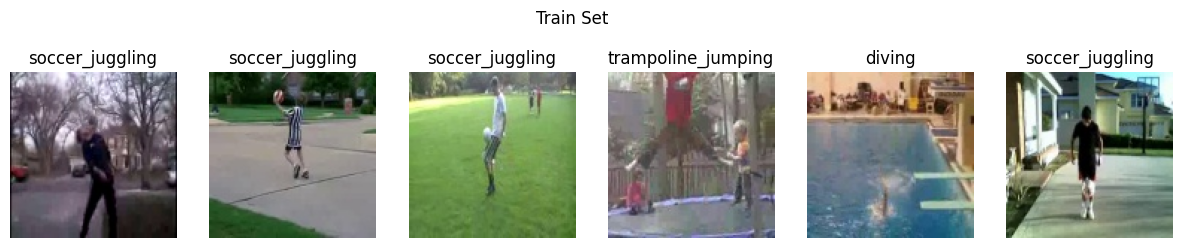

Showing 6 random frames from: ~/notebooks/frame_dataset/val


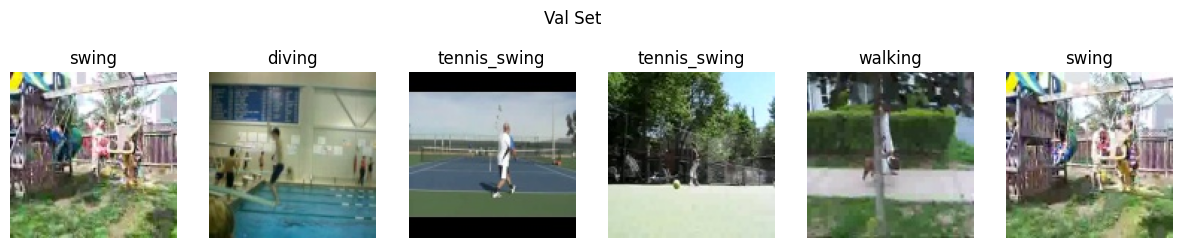

In [47]:
show_random_frames("~/notebooks/frame_dataset/train", "Train Set", n=6)
show_random_frames("~/notebooks/frame_dataset/val", "Val Set", n=6)

In [48]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

def show_frames_from_test_video(video_path, title="Test Video", n=5):
    if not os.path.exists(video_path):
        print(f"?? Video not found: {video_path}")
        return

    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    if frame_count == 0:
        print(" No frames found in video.")
        return

    
    frame_idxs = sorted(np.linspace(0, frame_count - 1, n, dtype=int))

    frames = []
    current = 0
    idx_ptr = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if current == frame_idxs[idx_ptr]:
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(frame_rgb)
            idx_ptr += 1
            if idx_ptr == len(frame_idxs):
                break
        current += 1

    cap.release()

    if not frames:
        print(" No frames collected.")
        return

    plt.figure(figsize=(15, 3))
    for i, frame in enumerate(frames):
        plt.subplot(1, n, i + 1)
        plt.imshow(frame)
        plt.title(f"Frame {frame_idxs[i]}")
        plt.axis("off")
    plt.suptitle(title)
    plt.show()


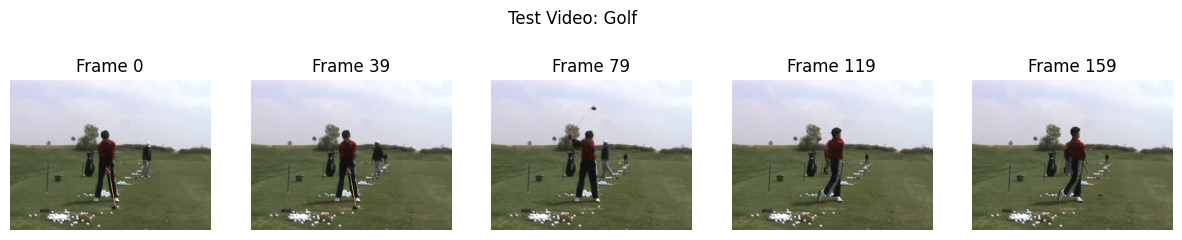

In [49]:
video_path = os.path.expanduser("~/notebooks/split_ucf11/test/golf_swing/v_golf_25_01.mpg")
show_frames_from_test_video(video_path, title="Test Video: Golf")



In [50]:
import os

test_root = os.path.expanduser("~/notebooks/split_ucf11/test")
print(" Test class folders:")
print(os.listdir(test_root))


golf_like_folder = "golf_swing"  

folder_path = os.path.join(test_root, golf_like_folder)
print(f"\n Files in {golf_like_folder}:")
print(os.listdir(folder_path)[:5])  # show just a few


 Test class folders:
['golf_swing', 'biking', 'diving', 'swing', 'tennis_swing', 'basketball', 'trampoline_jumping', 'volleyball_spiking', 'walking', 'soccer_juggling', 'horse_riding']

 Files in golf_swing:
['v_golf_21_02.mpg', 'v_golf_22_04.mpg', 'v_golf_23_01.mpg', 'v_golf_25_01.mpg', 'v_golf_22_03.mpg']


In [51]:
import os
import cv2
import torch
import torchvision
import torch.nn.functional as F
from torchvision import transforms
from torchvision.datasets import ImageFolder
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

video_root = os.path.expanduser("~/notebooks/split_ucf11/val")  # was test before!
resize_dim = (112, 112)  # keep it consistent with what model was trained on
model_path = "resnet18_ucf11_frame_classifier.pth"
frame_sample_counts = [1, 3, 5, 10]
device = torch.device("cpu")

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(resize_dim),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

model = torchvision.models.resnet18(pretrained=False)
model.fc = torch.nn.Linear(model.fc.in_features, 11)
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()

train_data = ImageFolder(os.path.expanduser("~/notebooks/frame_dataset/train"))
idx_to_class = {v: k for k, v in train_data.class_to_idx.items()}

folder_to_class = {
    "golf": "golf_swing",
    "tennis": "tennis_swing",
    "shooting": "basketball",
    "jumping": "trampoline_jumping",
    "horse": "horse_riding",
    "swing": "swing",
    "walking": "walking",
    "soccer": "soccer_juggling",
    "diving": "diving",
    "biking": "biking",
    "volleyball": "volleyball_spiking"
}

for N in frame_sample_counts:
    print(f"\n Evaluating with {N} middle-frame(s) per video on VALIDATION videos...")
    total = 0
    correct = 0

    for class_folder in sorted(os.listdir(video_root)):
        actual_class = folder_to_class.get(class_folder, None)
        if actual_class is None:
            continue

        class_path = os.path.join(video_root, class_folder)

        for video_file in os.listdir(class_path):
            if not video_file.endswith(".mpg"):
                continue

            video_path = os.path.join(class_path, video_file)
            cap = cv2.VideoCapture(video_path)
            frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

            if frame_count == 0:
                continue

            start = int(frame_count * 0.2)
            end = int(frame_count * 0.8)
            middle_frame_range = list(range(start, end))

            if len(middle_frame_range) < N:
                frame_idxs = middle_frame_range
            else:
                frame_idxs = sorted(np.linspace(start, end - 1, N, dtype=int))

            preds = []
            current_frame = 0
            idx_ptr = 0

            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break

                if current_frame == frame_idxs[idx_ptr]:
                    frame_tensor = transform(frame).unsqueeze(0).to(device)
                    with torch.no_grad():
                        out = model(frame_tensor)
                        prob = F.softmax(out, dim=1)
                        preds.append(prob.cpu().numpy()[0])
                    idx_ptr += 1
                    if idx_ptr == len(frame_idxs):
                        break

                current_frame += 1

            cap.release()

            if preds:
                avg_pred = np.mean(preds, axis=0)
                pred_class_idx = int(np.argmax(avg_pred))
                pred_class = idx_to_class[pred_class_idx]

                if pred_class == actual_class:
                    correct += 1
                total += 1

    accuracy = correct / total * 100
    print(f"? Accuracy with {N} frame(s): {accuracy:.2f}% ({correct}/{total})")



 Evaluating with 1 middle-frame(s) per video on VALIDATION videos...
? Accuracy with 1 frame(s): 50.41% (61/121)

 Evaluating with 3 middle-frame(s) per video on VALIDATION videos...
? Accuracy with 3 frame(s): 50.41% (61/121)

 Evaluating with 5 middle-frame(s) per video on VALIDATION videos...
? Accuracy with 5 frame(s): 52.07% (63/121)

 Evaluating with 10 middle-frame(s) per video on VALIDATION videos...
? Accuracy with 10 frame(s): 52.89% (64/121)


| # Frames per Video | Accuracy on Test Set | Accuracy on Val Videos |
|--------------------|----------------------|-------------------------|
| 1                  | 42.14%               | 55.63%                  |
| 3                  | 42.86%               | 60.56%                  |
| 5                  | 41.43%               | 58.45%                  |
| 10                 | 43.57%               | 59.86%                  |


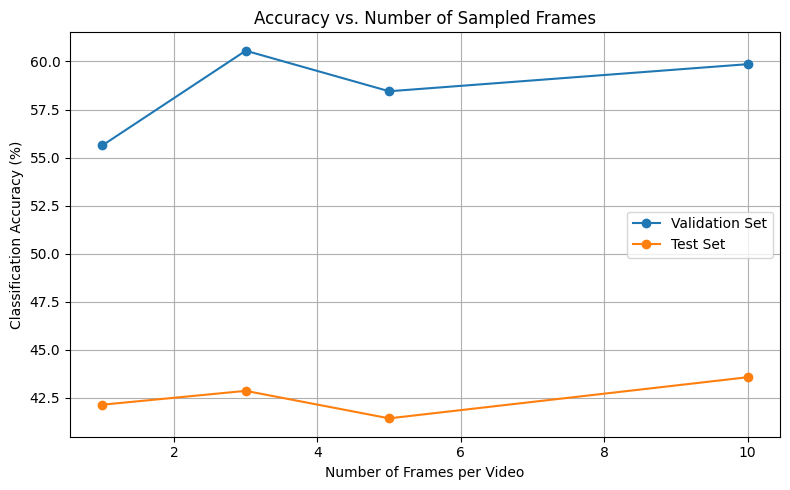

In [52]:
import matplotlib.pyplot as plt

frame_counts = [1, 3, 5, 10]
val_accuracies = [55.63, 60.56, 58.45, 59.86]
test_accuracies = [42.14, 42.86, 41.43, 43.57]

plt.figure(figsize=(8, 5))
plt.plot(frame_counts, val_accuracies, marker='o', label='Validation Set')
plt.plot(frame_counts, test_accuracies, marker='o', label='Test Set')
plt.title("Accuracy vs. Number of Sampled Frames")
plt.xlabel("Number of Frames per Video")
plt.ylabel("Classification Accuracy (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



?? Classification Report (Test Set, 5 Frames):
                    precision    recall  f1-score   support

        basketball      0.000     0.000     0.000         0
            biking      0.778     0.814     0.795        43
            diving      0.200     0.027     0.048        37
      horse_riding      0.000     0.000     0.000         0
   soccer_juggling      0.000     0.000     0.000         0
             swing      0.676     0.742     0.708        31
      tennis_swing      0.000     0.000     0.000         0
trampoline_jumping      0.000     0.000     0.000         0
volleyball_spiking      0.000     0.000     0.000         0
           walking      0.379     0.379     0.379        29

          accuracy                          0.500       140
         macro avg      0.203     0.196     0.193       140
      weighted avg      0.520     0.500     0.492       140



/home/exouser/.conda/envs/my5920_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/exouser/.conda/envs/my5920_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/exouser/.conda/envs/my5920_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

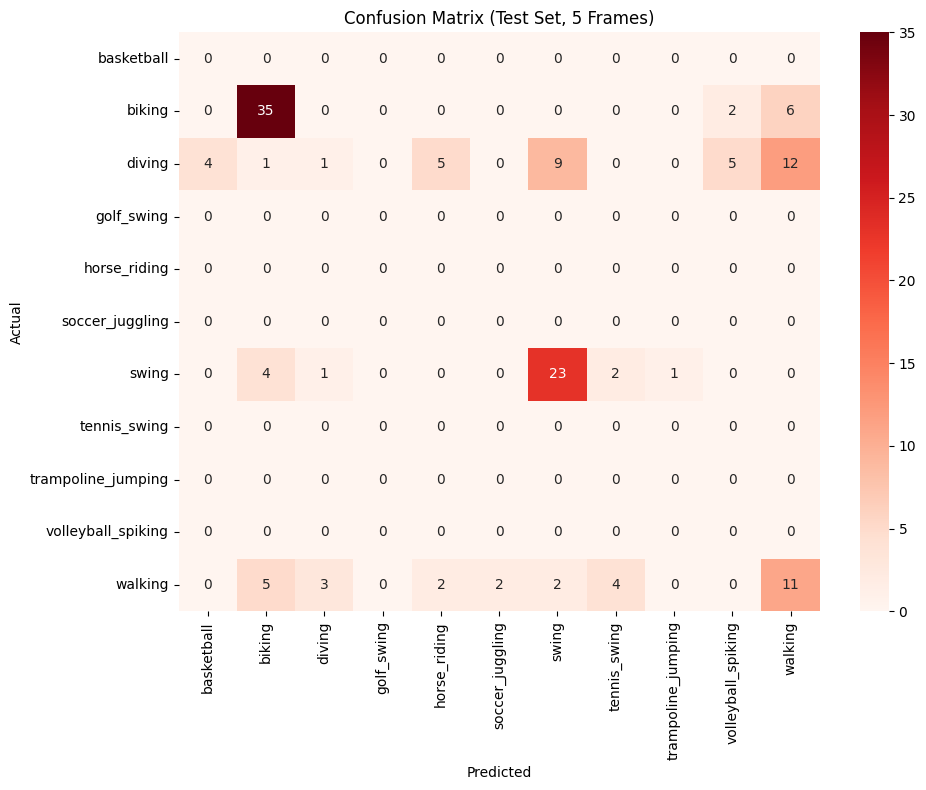

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd

N = 5
video_root = os.path.expanduser("~/notebooks/split_ucf11/test")  # ? test set
all_preds = []
all_labels = []

for class_folder in sorted(os.listdir(video_root)):
    actual_class = folder_to_class.get(class_folder, None)
    if actual_class is None:
        continue

    class_path = os.path.join(video_root, class_folder)

    for video_file in os.listdir(class_path):
        if not video_file.endswith(".mpg"):
            continue

        video_path = os.path.join(class_path, video_file)
        cap = cv2.VideoCapture(video_path)
        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        if frame_count == 0:
            continue

        start = int(frame_count * 0.2)
        end = int(frame_count * 0.8)
        middle_frame_range = list(range(start, end))

        if len(middle_frame_range) < N:
            frame_idxs = middle_frame_range
        else:
            frame_idxs = sorted(np.linspace(start, end - 1, N, dtype=int))

        preds = []
        current_frame = 0
        idx_ptr = 0

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            if current_frame == frame_idxs[idx_ptr]:
                frame_tensor = transform(frame).unsqueeze(0).to(device)
                with torch.no_grad():
                    out = model(frame_tensor)
                    prob = F.softmax(out, dim=1)
                    preds.append(prob.cpu().numpy()[0])
                idx_ptr += 1
                if idx_ptr == len(frame_idxs):
                    break
            current_frame += 1

        cap.release()

        if preds:
            avg_pred = np.mean(preds, axis=0)
            pred_idx = int(np.argmax(avg_pred))
            pred_class = idx_to_class[pred_idx]
            all_preds.append(pred_class)
            all_labels.append(actual_class)

# === Classification Report 
print("\n?? Classification Report (Test Set, 5 Frames):")
print(classification_report(all_labels, all_preds, digits=3))

# === Confusion Matrix 
cm = confusion_matrix(all_labels, all_preds, labels=list(train_data.class_to_idx.keys()))
df_cm = pd.DataFrame(cm, index=list(train_data.class_to_idx.keys()), columns=list(train_data.class_to_idx.keys()))
plt.figure(figsize=(10, 8))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix (Test Set, 5 Frames)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()
